In [6]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
%load_ext autoreload
%autoreload 2

In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [34]:
# from sklearn.datasets import fetch_openml
# mnist = fetch_openml('mnist_784', version=1, cache=True)
# X = mnist.data.values
# y = mnist.target
# img_shape = (28, 28)

In [35]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
img_shape = (8, 8)

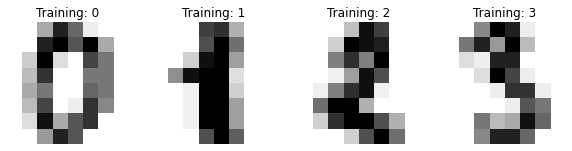

In [36]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape(img_shape), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % int(label))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2021)

### Reduce the data to 2 dimensions

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

### Fit Model

In [43]:
from unsupervised_learning.kmeans import KMeans

In [44]:
kmeans = KMeans(k=10, max_iterations=100)
kmeans

KMeans(k=10, max_iterations=100)

In [46]:
kmeans.fit(X_train_reduced)

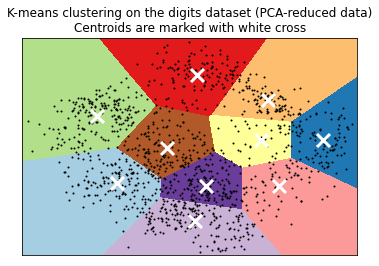

In [47]:
# This visualization snippet taken from 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#visualize-the-results-on-pca-reduced-data

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(X_train_reduced[:, 0], X_train_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans._centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()